*** Here I explain how Metropolis_Hasting work and later I show an example:***

The explanation will be LONG!

We can apply a process as follow:

1) For $k = 1, 2, ...$ We sample x' from a distribution $Q(x^k \rightarrow x')$

2) Accept proposal x' with probability $A(x^k \rightarrow x')$

So,  $Q(x \rightarrow x')$ defines the probability to go from x to x' and $A(x \rightarrow x')$ is the so called critic which gives the probabilty of accepting the proposal. And, we can defime the transition probabilty $T(x \rightarrow x')$ which is the product of the proposed dist. and our critic. 

We want our MC to generate point from the desired distribution which a stationary state (We assume the posteriori we want to sample is a stationary state of an MC):

$\pi(x') = \sum_x \pi(x) T(x \rightarrow x')$

As the transition matrix here is a product of $Q$ and $A$ we try to find $A$ such that the above equation being sattisfied. 

Before getting to find A, there is a short cut for definition of stationary state which is:

if $\pi(x) T(x \rightarrow x') = \pi(x') T(x' \rightarrow x)$ then $\pi(x)$ is stationary. 
The proof is really easy! and is presented below:

1) We use summation operator for both sides of the equation:

$\sum_x \pi(x) T(x \rightarrow x') = \sum_x \pi(x') T(x' \rightarrow x)$

2) x' is coming out of summation because is independet of x:

$\sum_x \pi(x) T(x \rightarrow x') = \pi(x') \sum_x T(x' \rightarrow x)$

3) As sum over all the possible outcomes of gping form x' to x is one, the above equation becomes: 

$\sum_x \pi(x) T(x \rightarrow x') = \pi(x')$

***Now lets get back to our problem, we are looking for a critic such that the MC created by it will produce samples from a stationary dist. $\pi(x)$***
***So we check for a critic A such that it makes a transition matrix T that satisfies stationary state equation of the form:***

$\pi(x) T(x \rightarrow x') = \pi(x') T(x' \rightarrow x)$

This equation can be re-written as follows:

$\pi(x) Q(x \rightarrow x') A(x \rightarrow x') = \pi(x') Q(x' \rightarrow x) A(x' \rightarrow x)$ which can be re_arranges as follows:

$\frac{A(x \rightarrow x')}{A(x' \rightarrow x)} = \frac{\pi(x') Q(x' \rightarrow x)}{\pi(x) Q(x \rightarrow x')}$

Doing a bit of algebra we can show:

$A(x \rightarrow x') = min (1, \frac{\pi(x') Q(x' \rightarrow x)}{\pi(x) Q(x \rightarrow x')})$

*** To summerize the whole thing:***

For $k = 1, 2, 3, ...$ we cample from any (wrong) $Q(x^k \rightarrow x')$ and we accept the x' with probability $A(x \rightarrow x')$.  

***This method is VERY usefull when we dont know the normalization constant of our posterior dist. ***

***The algorithm is as follows:***

1) pick an initial $x_0$
 
2)Iterate:

        Generate a random candidate according to Q
        
        Calculate the acceptence probabilty A
        
        Accept or reject:
        
                Generate a randon number u from a uniform dist.
                
                if u <= A : accept
                
                else: reject
                







Here is an example of a simple linear regression (y = theta*x). We define the likelihood based on the chi squared error between the prediction and true values of y for updated values of theta. 

We assume that Q is a Gasussian dist. and we sample from it.

In [51]:
import math
import numpy as np
import numpy 

x = np.array([1,2,3,4, 7, 9])
y = np.array([3,6, 9, 12, 21, 27])

def likelihood(x,y, theta):
    in_ = ((y-theta*x)**2)/len(x)
    return np.exp(-np.sum(in_))


theta_current = 0
current_likelihood = likelihood(x,y, theta_current)
chain = []

for i in range(5000):
    
    theta_proposed = theta_current+0.1*np.random.randn()
    proposed_likelihood = likelihood(x,y,theta_proposed)
    ratio = (proposed_likelihood)/(current_likelihood)
    A = min(1, ratio)
    
    u = np.random.rand()
    if u<= A:
        theta_current = theta_proposed
        current_likelihood = proposed_likelihood
        
    chain.append(theta_current)
    

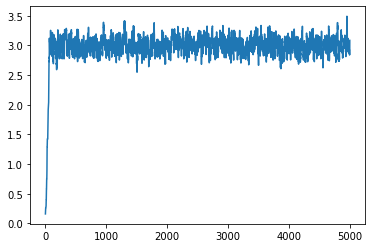

In [52]:
import matplotlib.pyplot as plt
plt.plot(chain)

In [53]:
print("the mean value for theta is:", np.mean(chain))
print("the standard deviation for theta is:", np.std(chain))

the mean value for theta is: 2.979833449804161
the standard deviation for theta is: 0.25091073227924526
